In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
data_path = "/home/roger/Desktop/rllte/all_procgen_runs/logs"
results = {}
two_head_results = {}
lstm_results = {}
two_head_lstm_results = {}

for experiment in os.listdir(data_path):
    exp_name = experiment.split("_s")[0]
    
    nested_ = os.listdir(os.path.join(data_path, experiment))[0]
    nested = os.path.join(data_path, experiment, nested_)

    if "twoHead" in exp_name and "LSTM" in exp_name:
        if exp_name not in two_head_lstm_results:
            two_head_lstm_results[exp_name] = []
            
        two_head_lstm_results[exp_name].append(
            pd.read_csv(os.path.join(nested, "train.log"))["episode_reward"]
        )
    elif "twoHead" in exp_name:
        if exp_name not in two_head_results:
            two_head_results[exp_name] = []

        two_head_results[exp_name].append(
            pd.read_csv(os.path.join(nested, "train.log"))["episode_reward"]
        )
    elif "LSTM" in exp_name:
        if exp_name not in lstm_results:
            lstm_results[exp_name] = []

        lstm_results[exp_name].append(
            pd.read_csv(os.path.join(nested, "train.log"))["episode_reward"]
        )
    else:
        if exp_name not in results:
            results[exp_name] = []

        results[exp_name].append(
            pd.read_csv(os.path.join(nested, "train.log"))["episode_reward"]
        )
    

In [3]:
list(lstm_results.keys())

['PPO_LSTM_1MazeMemory-v0_disagreement_obsRMS:True_rewNorm:none_updateProp:1.0_rff:False_weightInit:orthogonal',
 'PPO_LSTM_AllMazeMemory-v0_extrinsic_obsRMS:False_rewNorm:rms_updateProp:1.0_rff:False_weightInit:orthogonal',
 'PPO_LSTM_1MazeMemory-v0_extrinsic_obsRMS:False_rewNorm:rms_updateProp:1.0_rff:False_weightInit:orthogonal',
 'PPO_LSTM_1MazeMemory-v0_ride_obsRMS:True_rewNorm:rms_updateProp:0.1_rff:False_weightInit:orthogonal',
 'PPO_LSTM_1MazeMemory-v0_e3b_obsRMS:False_rewNorm:rms_updateProp:0.5_rff:False_weightInit:orthogonal',
 'PPO_LSTM_AllMazeMemory-v0_disagreement_obsRMS:True_rewNorm:none_updateProp:1.0_rff:False_weightInit:orthogonal',
 'PPO_LSTM_AllMazeMemory-v0_re3_obsRMS:False_rewNorm:minmax_updateProp:1.0_rff:False_weightInit:orthogonal',
 'PPO_LSTM_1MazeMemory-v0_rnd_obsRMS:True_rewNorm:none_updateProp:1.0_rff:False_weightInit:orthogonal',
 'PPO_LSTM_1MazeMemory-v0_icm_obsRMS:True_rewNorm:none_updateProp:1.0_rff:False_weightInit:orthogonal',
 'PPO_LSTM_AllMazeMemory-

In [4]:
# for each key, make sure all runs are exactly of the same length
for key in results:
    min_len = min([len(x) for x in results[key]])
    results[key] = [x[:min_len] for x in results[key]]

for key in two_head_results:
    min_len = min([len(x) for x in two_head_results[key]])
    two_head_results[key] = [x[:min_len] for x in two_head_results[key]]

for key in lstm_results:
    min_len = min([len(x) for x in lstm_results[key]])
    lstm_results[key] = [x[:min_len] for x in lstm_results[key]]

for key in two_head_lstm_results:
    min_len = min([len(x) for x in two_head_lstm_results[key]])
    two_head_lstm_results[key] = [x[:min_len] for x in two_head_lstm_results[key]]


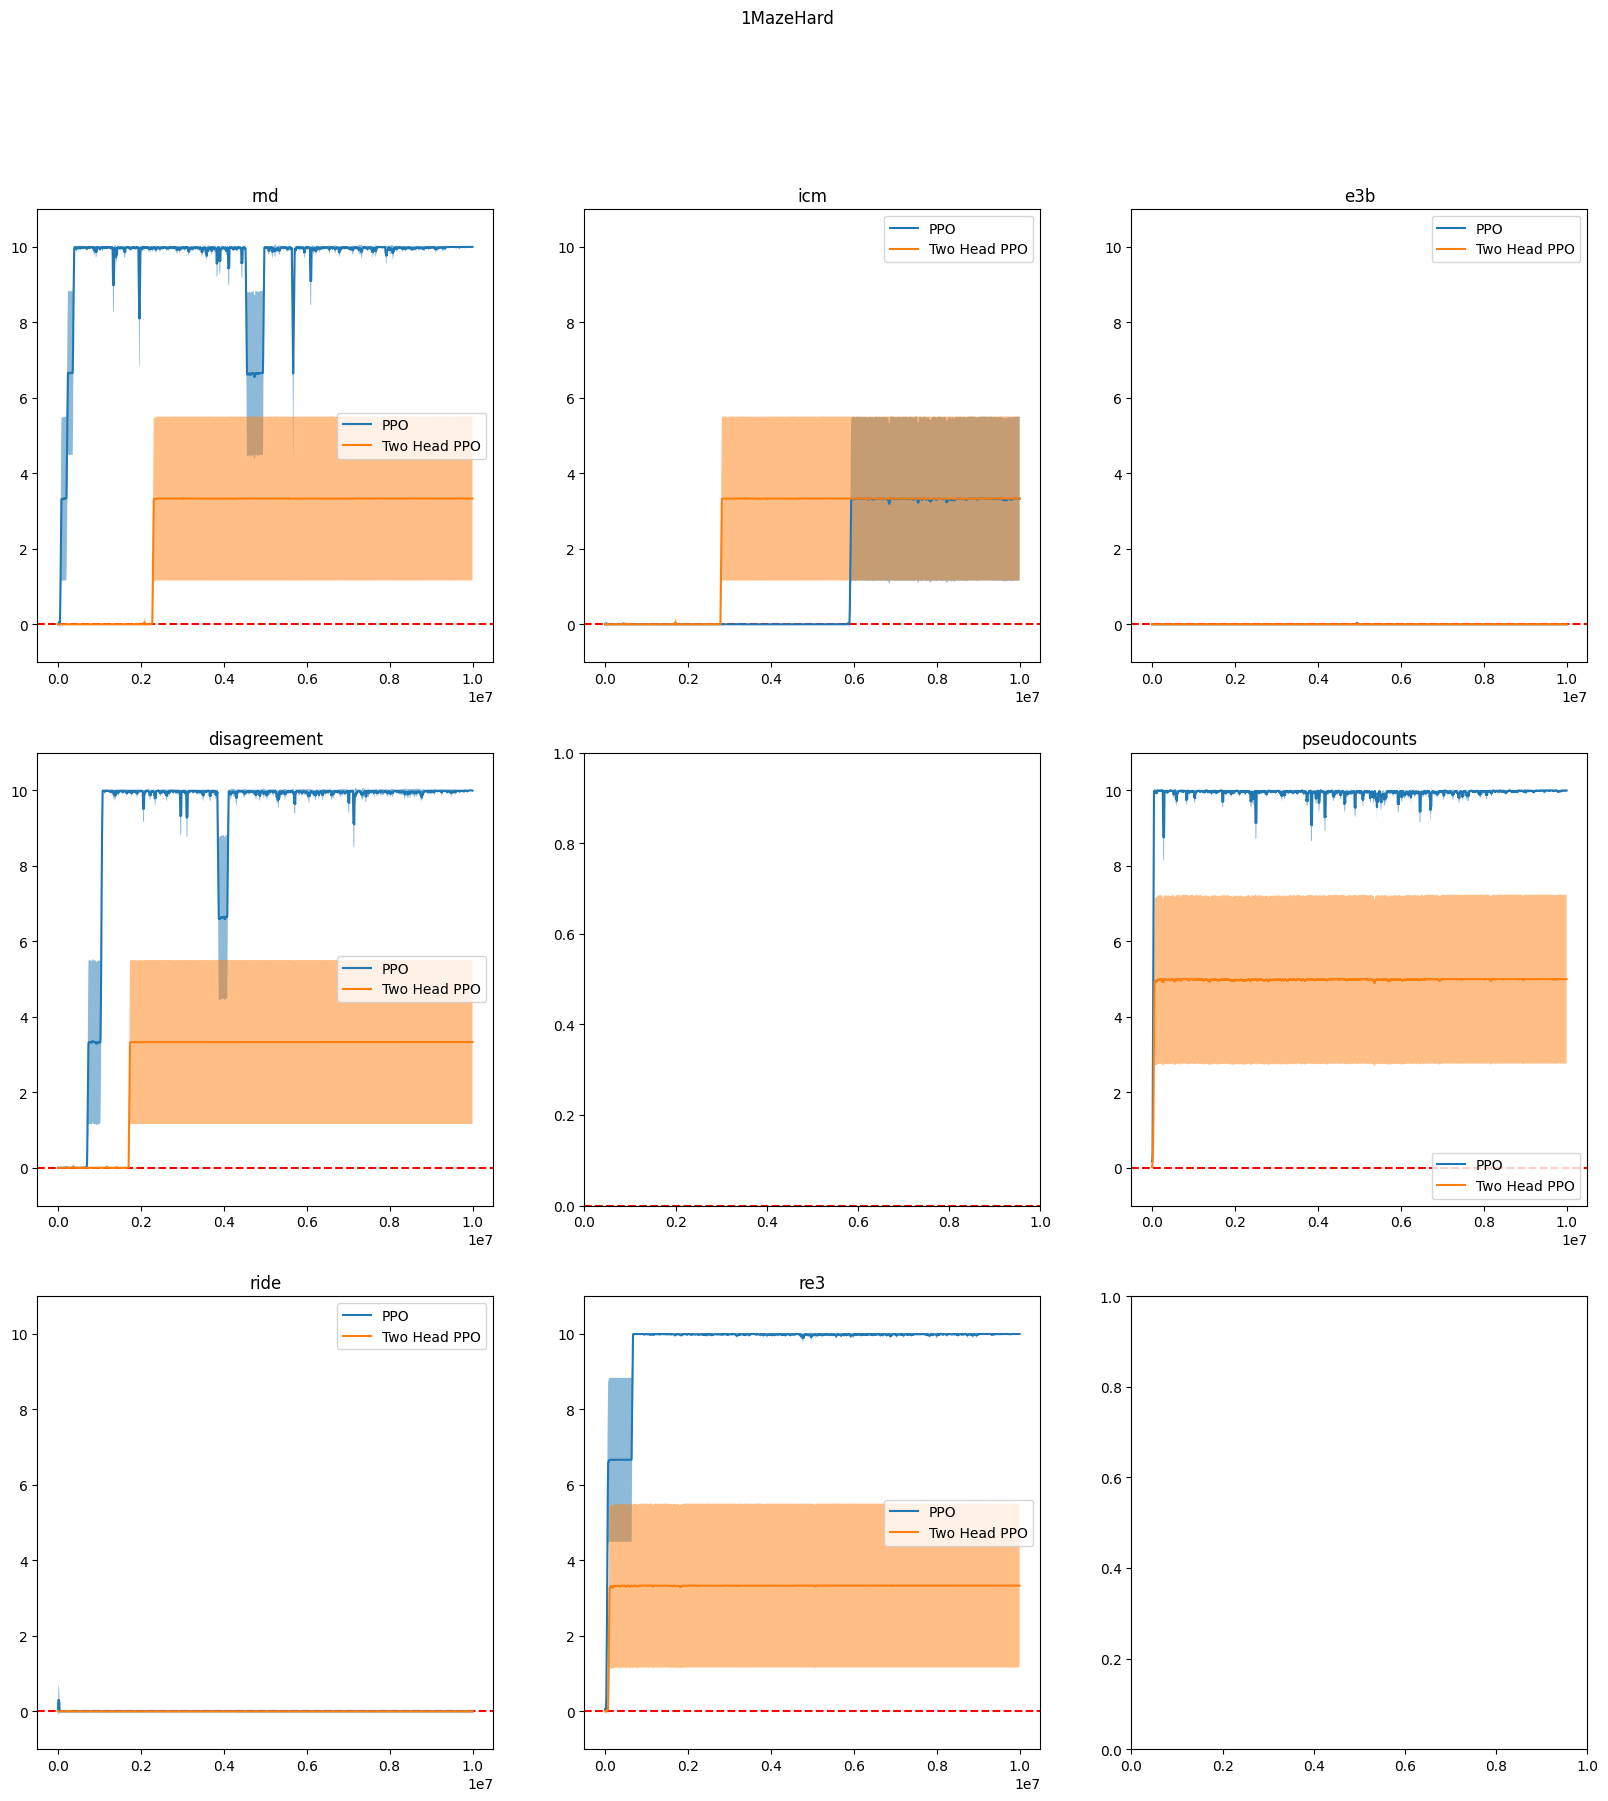

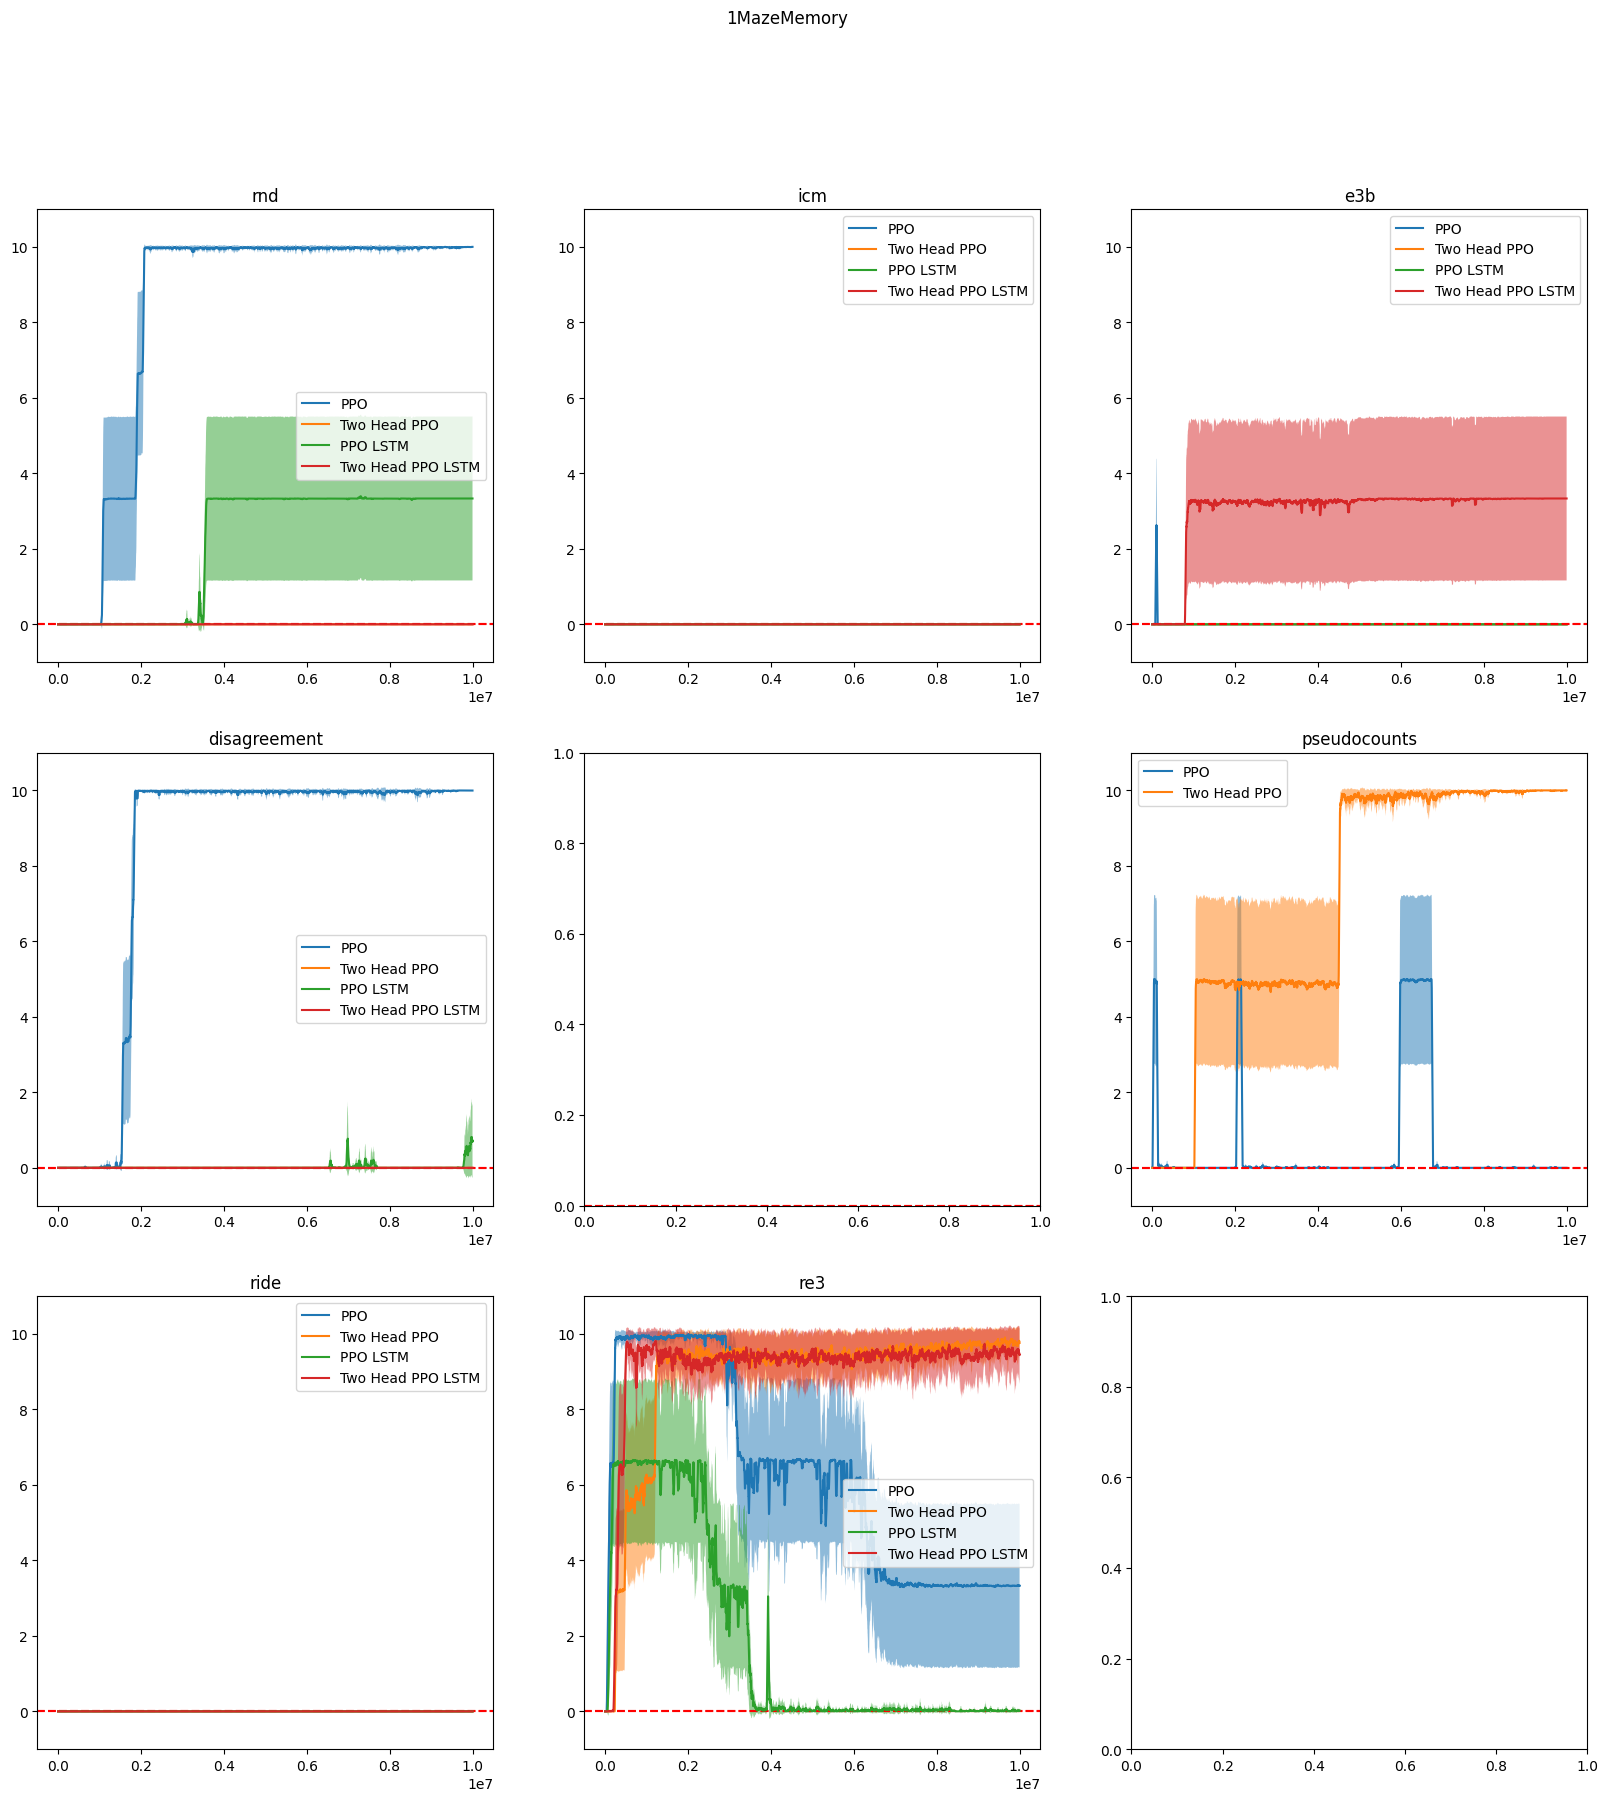

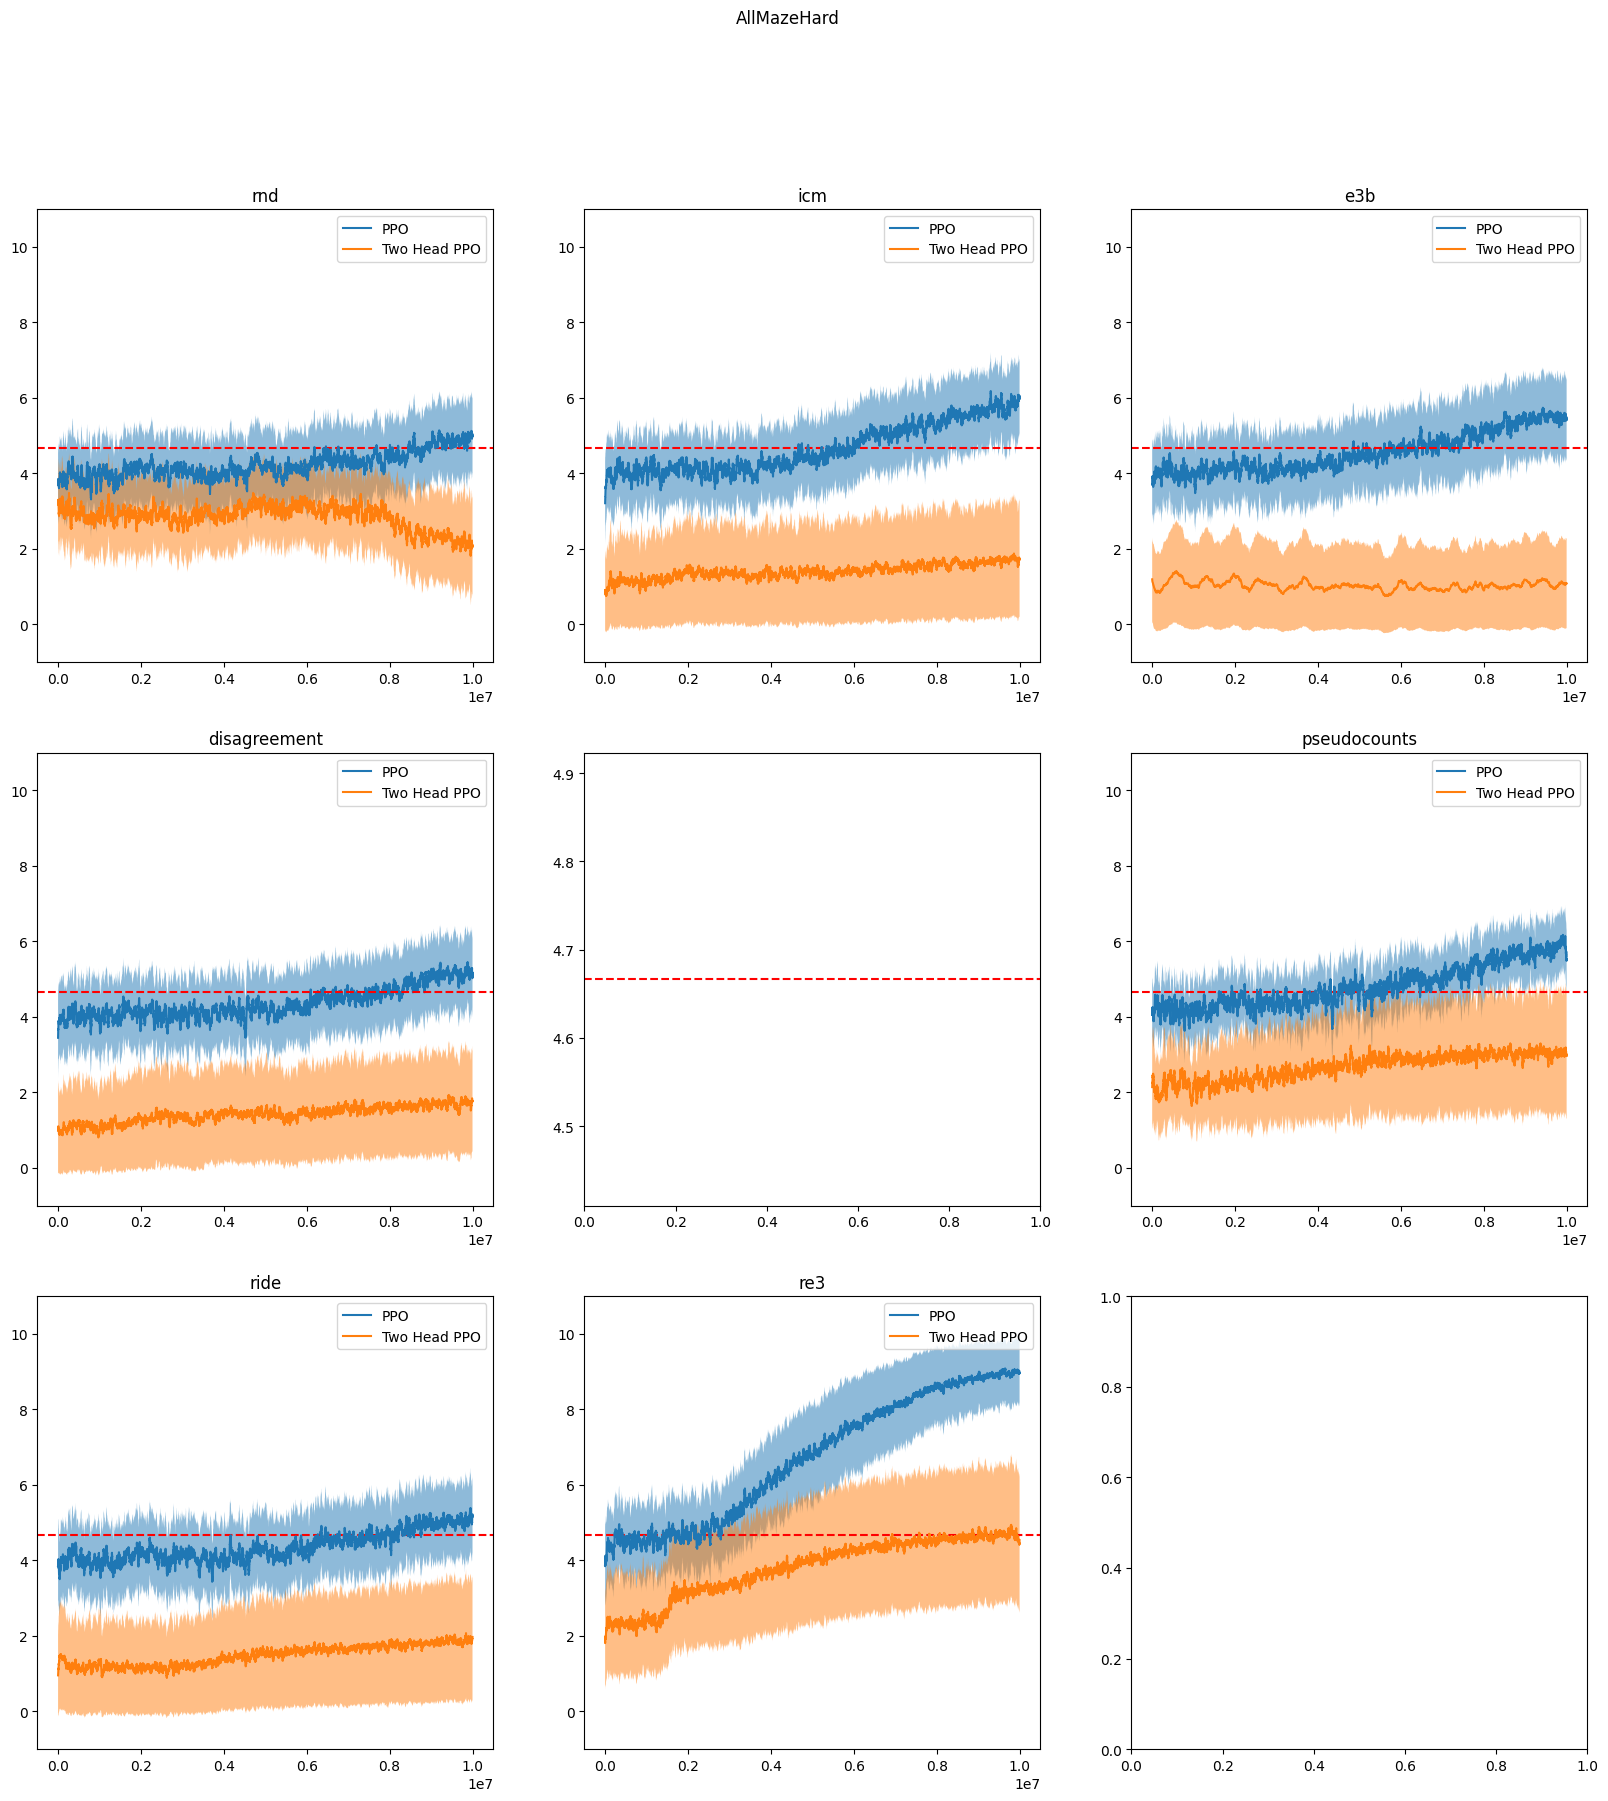

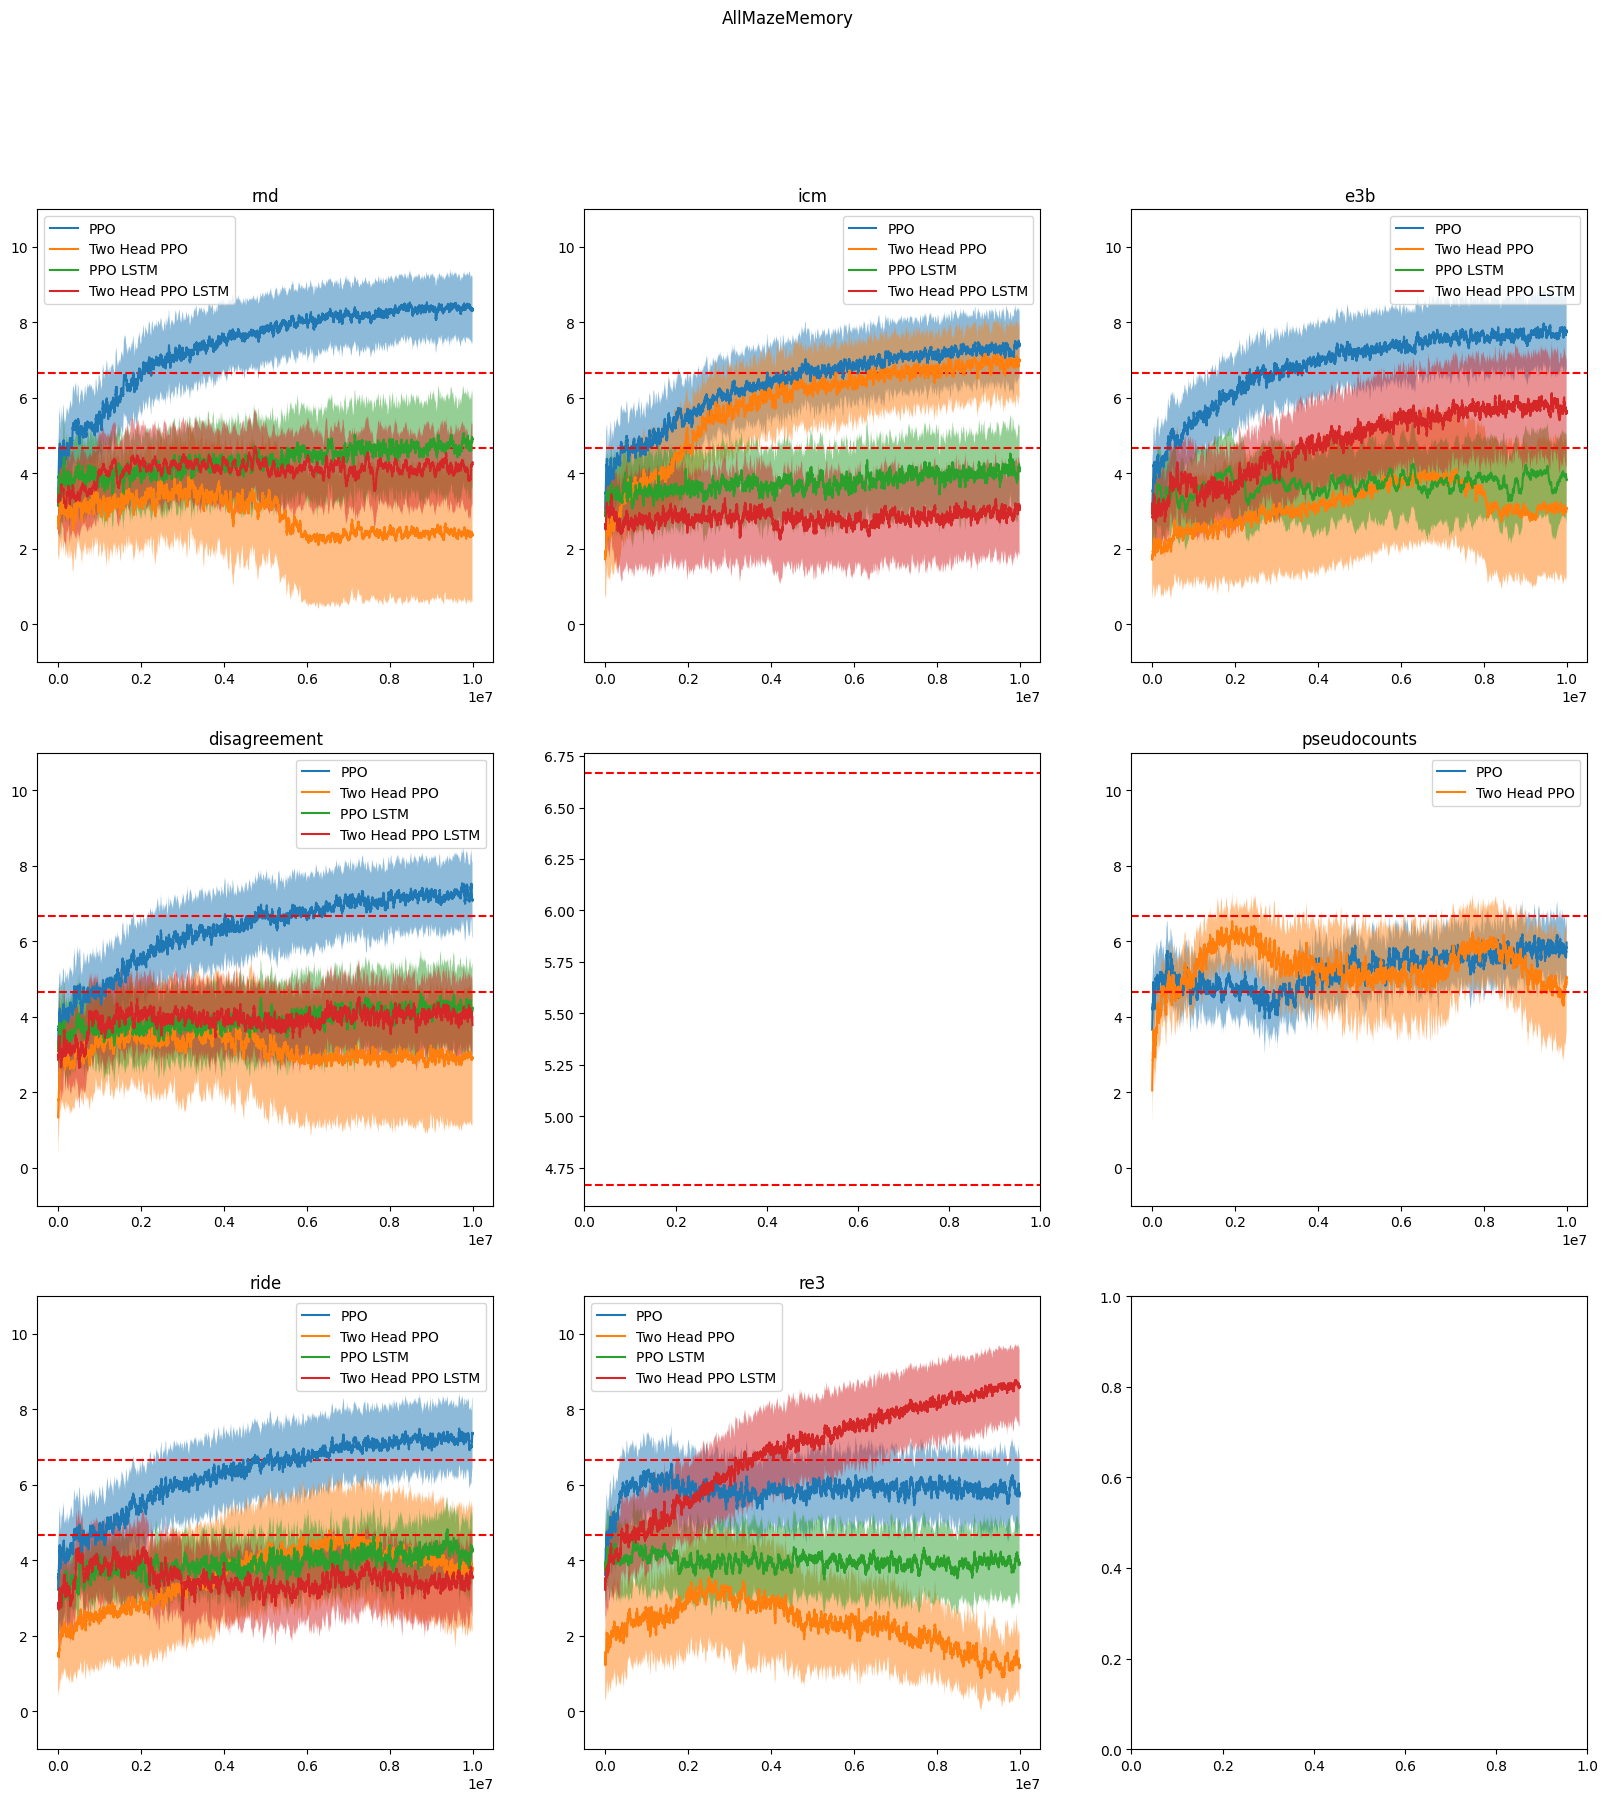

In [5]:
# plot the 9 different experiments (subplots 3,3). one for each env
envs = ["1MazeHard", "1MazeMemory", "AllMazeHard", "AllMazeMemory"]
algo_names = ["rnd", "icm", "e3b", "disagreement", "ngu", "pseudocounts", "ride", "re3"]
num_plots = 3

for env_name in envs:
    fig, axs = plt.subplots(num_plots, num_plots, figsize=(20,20))
    fig.suptitle(env_name)
    results_for_env = {key: results[key] for key in results if env_name in key}
    lstm_results_for_env = {key: lstm_results[key] for key in lstm_results if env_name in key}
    two_head_results_for_env = {key: two_head_results[key] for key in two_head_results if env_name in key}
    two_head_lstm_results_for_env = {key: two_head_lstm_results[key] for key in two_head_lstm_results if env_name in key}
    i = 0
    smooth = 150
    for algo in algo_names:
        for key in sorted(results_for_env.keys()):
            if env_name in key and "extrinsic" in key:
                # take the mean of the last 100 episodes
                hline = np.mean(results_for_env[key][-100:], axis=0)[-1]
                axs[i//num_plots, i%num_plots].axhline(hline, color='r', linestyle='--')

            if env_name in key and algo in key:
                mean = np.mean(results[key], axis=0)
                std = np.std(results[key], axis=0) ** 0.5

                # smooth mean and std with convolve
                mean = np.convolve(mean, np.ones(smooth)/smooth, mode='valid')
                std = np.convolve(std, np.ones(smooth)/smooth, mode='valid')

                x_axis = np.linspace(0, 10_000_000, len(mean))
                run_name = "PPO"
                axs[i//num_plots, i%num_plots].plot(x_axis, mean, label=run_name)
                axs[i//num_plots, i%num_plots].fill_between(x_axis, mean-std, mean+std, alpha=0.5)
                axs[i//num_plots, i%num_plots].legend()
                reward_name = key.split("_")[2]
                axs[i//num_plots, i%num_plots].set_title(reward_name)
                axs[i//num_plots, i%num_plots].set_ylim(-1, 11)

        for key in sorted(two_head_results_for_env.keys()):
            if env_name in key and "extrinsic" in key and "twoHead" in key:
                hline = np.mean(two_head_results_for_env[key], axis=0)[-1]
                axs[i//num_plots, i%num_plots].axhline(hline, color='r', linestyle='--')

            if env_name in key and algo in key:
                mean = np.mean(two_head_results[key], axis=0)
                std = np.std(two_head_results[key], axis=0) ** 0.5

                # smooth mean and std with convolve
                mean = np.convolve(mean, np.ones(smooth)/smooth, mode='valid')
                std = np.convolve(std, np.ones(smooth)/smooth, mode='valid')

                x_axis = np.linspace(0, 10_000_000, len(mean))
                run_name = "Two Head PPO"
                axs[i//num_plots, i%num_plots].plot(x_axis, mean, label=run_name)
                axs[i//num_plots, i%num_plots].fill_between(x_axis, mean-std, mean+std, alpha=0.5)
                axs[i//num_plots, i%num_plots].legend()
                reward_name = key.split("_")[2]
                axs[i//num_plots, i%num_plots].set_title(reward_name)
                axs[i//num_plots, i%num_plots].set_ylim(-1, 11)

        for key in sorted(lstm_results_for_env.keys()):
            if env_name in key and "extrinsic" in key and "LSTM" in key:
                hline = np.mean(lstm_results_for_env[key], axis=0)[-1]
                axs[i//num_plots, i%num_plots].axhline(hline, color='r', linestyle='--')

            if env_name in key and algo in key:
                mean = np.mean(lstm_results[key], axis=0)
                std = np.std(lstm_results[key], axis=0) ** 0.5

                # smooth mean and std with convolve 
                mean = np.convolve(mean, np.ones(smooth)/smooth, mode='valid')
                std = np.convolve(std, np.ones(smooth)/smooth, mode='valid')

                x_axis = np.linspace(0, 10_000_000, len(mean))
                run_name = "PPO LSTM"
                axs[i//num_plots, i%num_plots].plot(x_axis, mean, label=run_name)
                axs[i//num_plots, i%num_plots].fill_between(x_axis, mean-std, mean+std, alpha=0.5)
                axs[i//num_plots, i%num_plots].legend()
                reward_name = key.split("_")[3]
                axs[i//num_plots, i%num_plots].set_title(reward_name)
                axs[i//num_plots, i%num_plots].set_ylim(-1, 11)

        for key in sorted(two_head_lstm_results_for_env.keys()):
            if env_name in key and "extrinsic" in key and "LSTM" in key and "twoHead" in key:
                hline = np.mean(two_head_lstm_results_for_env[key], axis=0)[-1]
                axs[i//num_plots, i%num_plots].axhline(hline, color='r', linestyle='--')

            if env_name in key and algo in key:
                mean = np.mean(two_head_lstm_results[key], axis=0)
                std = np.std(two_head_lstm_results[key], axis=0) ** 0.5

                # smooth mean and std with convolve
                mean = np.convolve(mean, np.ones(smooth)/smooth, mode='valid')
                std = np.convolve(std, np.ones(smooth)/smooth, mode='valid')

                x_axis = np.linspace(0, 10_000_000, len(mean))
                run_name = "Two Head PPO LSTM"
                axs[i//num_plots, i%num_plots].plot(x_axis, mean, label=run_name)
                axs[i//num_plots, i%num_plots].fill_between(x_axis, mean-std, mean+std, alpha=0.5)
                axs[i//num_plots, i%num_plots].legend()
                reward_name = key.split("_")[3]
                axs[i//num_plots, i%num_plots].set_title(reward_name)
                axs[i//num_plots, i%num_plots].set_ylim(-1, 11)
        
        i += 1

    plt.show()